In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
customers = pd.read_csv('./olist_customers_dataset.csv')
geolocation = pd.read_csv('./olist_geolocation_dataset.csv')
order_items = pd.read_csv('./olist_order_items_dataset.csv')
order_payments = pd.read_csv('./olist_order_payments_dataset.csv')
order_review = pd.read_csv('./olist_order_reviews_dataset.csv')
orders = pd.read_csv('./olist_orders_dataset.csv')
products = pd.read_csv('./olist_products_dataset.csv')
sellers = pd.read_csv('./olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('./product_category_name_translation.csv')

Recommendation system for e-commerce businesses

A well developed recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.

The recommendation system, I have designed below is based on the journey of a new customer from the time he/she lands on the business’s website for the first time to when he/she makes repeat purchases.

The recommendation system is designed in 3 parts based on the business context:

Recommendation system part I: Product pupularity based system targetted at new customers

Recommendation system part II: Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items

Recommendation system part III: When a business is setting up its e-commerce website for the first time withou any product rating

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

Recommendation System - Part I

Product popularity based recommendation system targeted at new customers

Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

In [4]:
order_review.fillna(method= 'bfill', axis = 0).fillna(0).tail(100)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99900,92f7668f880c5774b78a928ec7e9e5a8,666cef1ea6542e749eed5394238041a2,5,entregue rapido,"I loved the pendants, they came just the way I...",22/11/2017 00:00,22/11/2017 21:22
99901,f37aef9f15a081d0790c6e76ad630160,354f62589ab0a15eb57e820d6fcbe9b5,4,entregue rapido,Very good quality product!,05/04/2017 00:00,06/04/2017 17:51
99902,41ab6a6885ad757f124eb3879402dae3,e5cefdab54d9844f44c6d68f3611f145,5,entregue rapido,Very good quality product!,12/05/2018 00:00,12/05/2018 16:59
99903,94756df369bf6a028be944d3d05c8883,e2fbbc5e799749941a23275230ee1d8b,4,entregue rapido,Very good quality product!,15/03/2018 00:00,15/03/2018 12:53
99904,14a2d3113abbac24a5b463b8d1376d8f,4d0c3a21d494b800520fb1dbaa715164,3,entregue rapido,Very good quality product!,30/08/2018 00:00,31/08/2018 21:14
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,0,"Excellent backpack, super fast delivery. I hig...",09/12/2017 00:00,11/12/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,0,"Excellent backpack, super fast delivery. I hig...",22/03/2018 00:00,23/03/2018 09:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,0,I ordered the purchase of a Celtic/Prism/Meriv...,01/07/2018 00:00,02/07/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,0,I ordered the purchase of a Celtic/Prism/Meriv...,15/12/2017 00:00,16/12/2017 01:29


In [5]:
orders.fillna(method= 'bfill', axis = 0).fillna(0).head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [6]:
products.fillna(method= 'bfill', axis = 0).fillna(0).tail(100)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32851,026311ea0b72ef8c80ebf91efd36b499,bebes,52.0,708.0,1.0,300.0,18.0,8.0,24.0
32852,c4ceee876c82b8328e9c293fa0e1989b,bebes,55.0,1636.0,1.0,700.0,28.0,3.0,43.0
32853,34c84b2e246f5904a5b3597b00240ea2,bebes,55.0,1636.0,1.0,600.0,20.0,13.0,13.0
32854,8d99a7ed81f061ceed740d8900be880a,cama_mesa_banho,55.0,396.0,1.0,3775.0,35.0,13.0,25.0
32855,75bc0bb91f61a5baa249e4db903eb504,ferramentas_jardim,58.0,143.0,1.0,3800.0,35.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [7]:
data1 = order_review.merge(orders, on='order_id')
data1

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00:00,11/03/2018 03:05,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00:00,18/02/2018 14:36,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,received it well before the stipulated time.,21/04/2017 00:00,21/04/2017 22:02,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Congratulations Lannister stores I loved shopp...,01/03/2018 00:00,02/03/2018 10:26,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,09/12/2017 00:00,11/12/2017 20:06,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excellent backpack, super fast delivery. I hig...",22/03/2018 00:00,23/03/2018 09:10,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,01/07/2018 00:00,02/07/2018 12:59,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,I ordered the purchase of a Celtic/Prism/Meriv...,15/12/2017 00:00,16/12/2017 01:29,8df587ce8a11ee97b3de9ef3405245c2,delivered,2017-12-10 18:44:23,2017-12-12 03:59:36,2017-12-12 18:05:41,2017-12-14 22:04:30,2017-12-29 00:00:00


In [8]:
order_items.shape

(112650, 7)

In [9]:
data2 = data1.merge(order_items, on='order_id')
data2

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00:00,11/03/2018 03:05,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00:00,18/02/2018 14:36,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,received it well before the stipulated time.,21/04/2017 00:00,21/04/2017 22:02,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113317,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,09/12/2017 00:00,11/12/2017 20:06,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00,1,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77
113318,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excellent backpack, super fast delivery. I hig...",22/03/2018 00:00,23/03/2018 09:10,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00,1,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59
113319,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,01/07/2018 00:00,02/07/2018 12:59,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00,1,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,2018-06-26 18:15:29,50.95,15.46
113320,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,I ordered the purchase of a Celtic/Prism/Meriv...,15/12/2017 00:00,16/12/2017 01:29,8df587ce8a11ee97b3de9ef3405245c2,delivered,2017-12-10 18:44:23,2017-12-12 03:59:36,2017-12-12 18:05:41,2017-12-14 22:04:30,2017-12-29 00:00:00,1,54caa022e792f1ce31d4a656cecaa802,25cf099de44674fde97473224f9d59ab,2017-12-19 03:59:36,10.00,7.78


In [10]:
data3 = data2[['customer_id', 'product_id', 'review_score']]
data3

,customer_id,product_id,review_score
0,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4
1,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4
2,8a2e7ef9053dea531e4dc76bd6d853e6,be0dbdc3d67d55727a65d4cd696ca73c,5
3,e226dfed6544df5b7b87a48208690feb,d1c427060a0f73f6b889a5c7c61f2ac4,5
4,de6dff97e5f1ba84a3cd9a3bc97df5f6,52c80cedd4e90108bf4fa6a206ef6b03,5
...,...,...,...
113317,d0d7086dea6fcf42b9b690b9f3745c58,3a33c980b62eb1ef3b8ae61b6fc6fe55,5
113318,fcc7b1caafe3b77fd587bab964c4d1fb,8ba0118a487ec8671aed57e5ef846574,5
113319,3aa00401736823c73e9fe8683328fa6b,73a7fbf8c1048131f3b531af31bcdf0e,4
113320,8df587ce8a11ee97b3de9ef3405245c2,54caa022e792f1ce31d4a656cecaa802,1


In [11]:
data3.head()

,customer_id,product_id,review_score
0,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4
1,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4
2,8a2e7ef9053dea531e4dc76bd6d853e6,be0dbdc3d67d55727a65d4cd696ca73c,5
3,e226dfed6544df5b7b87a48208690feb,d1c427060a0f73f6b889a5c7c61f2ac4,5
4,de6dff97e5f1ba84a3cd9a3bc97df5f6,52c80cedd4e90108bf4fa6a206ef6b03,5


In [12]:
data3.shape

(113322, 3)

In [13]:
data3.dtypes

customer_id     object
product_id      object
review_score     int64
dtype: object

In [14]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113322 entries, 0 to 113321
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   113322 non-null  object
 1   product_id    113322 non-null  object
 2   review_score  113322 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [15]:
data3.describe()['review_score'].T

count    113322.000000
mean          4.015469
std           1.400166
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

<AxesSubplot:xlabel='product_id'>

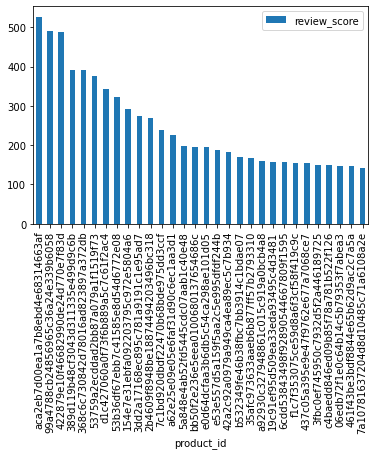

In [16]:
popular_products = pd.DataFrame(data3.groupby('product_id')['review_score'].count())
most_popular = popular_products.sort_values('review_score', ascending=False)
most_popular.head(10)
most_popular.head(30).plot(kind = "bar")

Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # aca2eb7d00ea1a7b8ebd4e68314663af  has sales of over 500, the next most popular product, ID # 99a4788cb24856965c36a24e339b6058  has sales of near 500, etc.

Recommendation System - Part II

Model-based collaborative filtering system

Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

Utility Matrix based on products sold and user reviews

Utility Matrix

An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [17]:
new_data = data3.sample(10000)
ratings_matrix = new_data.pivot_table(values='review_score', index='customer_id', columns='product_id', fill_value=0)



In [18]:
ratings_matrix.head()

product_id,001795ec6f1b187d37335e1c4704762e,001b72dfd63e9833e8c02742adf472e3,002159fe700ed3521f46cfcf6e941c76,002af88741ba70c7b5cf4e4a0ad7ef85,003128f981470c3e5a2e7445e4a771cd,004552d98c5d3653af8b4dbe8def0048,005030ef108f58b46b78116f754d8d38,006baa9a5b8f95895f15273a35bc2664,007c63ae4b346920756b5adcad8095de,0081787b18cce4acc2d1adec4520d7ba,...,ffa7e0cbe11656d11a117b534bb1db27,ffaf0af7eebb57c7f262b51ebb05dfd6,ffb2a783fe9381154e13bb3457651996,ffbe169d395060d7fb975c990581a329,ffc9caf33e2d1e9f44e3e06da19085f7,ffce5ed9e0bcc2e46796b988cdac733b,ffcfaba393e8ef71937c6e8421bc2868,ffd4bf4306745865e5692f69bd237893,ffd60d515c690a976c497e75cd2336f4,ffd63ee42a5c8cc5a15a1c8e2aa50011
customer_id,,,,,,,,,,,,,,,,,,,,,
00066ccbe787a588c52bd5ff404590e3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00072d033fe2e59061ae5c3aff1a2be5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0010068a73b7c56da5758c3f9e5c7375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0018f7fde63ca77254dbc47f4ea358b2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002ebb669a34b9e79c88efc755e95322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [19]:
ratings_matrix.shape

(9830, 6518)

Transposing the matrix

In [20]:
X = ratings_matrix.T
X.head()

customer_id,00066ccbe787a588c52bd5ff404590e3,00072d033fe2e59061ae5c3aff1a2be5,0010068a73b7c56da5758c3f9e5c7375,0018f7fde63ca77254dbc47f4ea358b2,002ebb669a34b9e79c88efc755e95322,002f90a6eb386bc43bc9ba200db31a89,00314f95a054231742e3c5396b333b88,00331de1659c7f4fb660c8810e6de3f5,003b595c764773e20e0949b6fba7b1dc,00426311a53f3c052943c88b692a3be2,...,ffca7ff7204c1ab5533bc3475a7fe18a,ffd1de7d1aaba96f625807ae058cda15,ffd733037d6daf1e080fba1890236d00,ffdaaad4323306777060ca43b3f87e7f,fff55ba8dffa552b6fdfd86c2e806459,fff5dd22d522cf28a902185817642a2e,fff675a0d5924b9162b4a1bf410466cd,fff7466a253c0e59499ea943462c10f9,fff89c8ed4fcf69a823c1d149e429a0b,fff93c1da78dafaaa304ff032abc6205
product_id,,,,,,,,,,,,,,,,,,,,,
001795ec6f1b187d37335e1c4704762e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002159fe700ed3521f46cfcf6e941c76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002af88741ba70c7b5cf4e4a0ad7ef85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003128f981470c3e5a2e7445e4a771cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X.shape

(6518, 9830)

Unique products in subset of data

In [22]:
X1 = X

In [23]:
# Decomposition the Matrix
from sklearn.decomposition import TruncatedSVD
SVG = TruncatedSVD(n_components=10)
decomposition_matrix = SVG.fit_transform(X)
decomposition_matrix.shape

(6518, 10)

In [24]:
# Correlation Matrix
correlation_matrix = np.corrcoef(decomposition_matrix)
correlation_matrix.shape

(6518, 6518)

Isolating Product ID # 049ac5dce8536884a652ce73c58022ab from the Correlation Matrix

Assuming the customer buys Product ID # 049ac5dce8536884a652ce73c58022ab (randomly chosen)

In [25]:
X.index[99]

'03c395f45f46b57acf3db9a696fba6d6'

Index # of product ID purchased by customer

In [27]:
i = '03c395f45f46b57acf3db9a696fba6d6'

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [28]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(6518,)

Recommendation top 10 highly correlated Products in sequence.

In [29]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['03b58043df5d7424df7eac2be2511c51',
 '07821918ef487fd64eb20b3c8aeb897f',
 '094615cac200c0dc4620ae28485f81f5',
 '0abf3e78cba7361d44b40b471592ad38',
 '0b886cf92902bb5607b317a270f4dd4d',
 '0c9ff9d8ed9b9bdd825487b3a66e05f5',
 '144266e1585320d057797a369596bb8b',
 '161ccc972b7b25a5e2d43376b8b333c5',
 '165f86fe8b799a708a20ee4ba125c289']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

Recommendation System - Part III


For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [30]:
products.shape

(32951, 9)

In [31]:
# Missing values

products_categories = products.dropna()
products_categories.shape
products_categories.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
product_descriptions1 = products_categories.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_category_name"].head(10)

0               perfumaria
1                    artes
2            esporte_lazer
3                    bebes
4    utilidades_domesticas
5    instrumentos_musicais
6               cool_stuff
7         moveis_decoracao
8         eletrodomesticos
9               brinquedos
Name: product_category_name, dtype: object

Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [33]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_category_name"])
X1

<500x49 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in Compressed Sparse Row format>

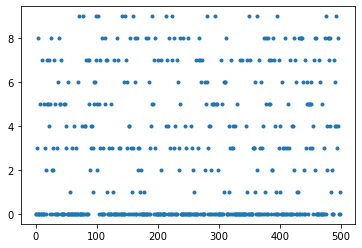

In [34]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [35]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 esporte_lazer
 telefonia
 relogios_presentes
 cool_stuff
 fashion_bolsas_e_acessorios
 papelaria
 ferramentas_jardim
 malas_acessorios
 consoles_games
 pet_shop
Cluster 1:
 brinquedos
 utilidades_domesticas
 construcao_ferramentas_construcao
 eletroportateis
 eletronicos
 eletrodomesticos_2
 eletrodomesticos
 cool_stuff
 construcao_ferramentas_seguranca
 construcao_ferramentas_jardim
Cluster 2:
 cama_mesa_banho
 utilidades_domesticas
 construcao_ferramentas_construcao
 eletroportateis
 eletronicos
 eletrodomesticos_2
 eletrodomesticos
 cool_stuff
 construcao_ferramentas_seguranca
 construcao_ferramentas_jardim
Cluster 3:
 utilidades_domesticas
 fashion_bolsas_e_acessorios
 eletroportateis
 eletronicos
 eletrodomesticos_2
 eletrodomesticos
 cool_stuff
 construcao_ferramentas_seguranca
 construcao_ferramentas_jardim
 construcao_ferramentas_iluminacao
Cluster 4:
 moveis_decoracao
 utilidades_domesticas
 consoles_games
 eletroportateis
 eletronicos
 eletr

/Users/hninthetpanoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Predicting clusters based on key search words

cutting tool

In [36]:
print("Cluster ID:")
Y = vectorizer.transform(["papelaria"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[0]


In [37]:
print("Cluster ID:")
Y = vectorizer.transform(["utilidades_domesticas"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[3]


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

Summary:

This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.

Evaluation 

In [39]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Merge the datasets
data = orders.merge(order_items, on='order_id')
data = data.merge(order_payments, on='order_id')
data = data.merge(order_review, on='order_id')
data = data.merge(customers, on='customer_id')

# Select the relevant columns for the recommendation task
data = data[['customer_unique_id', 'product_id', 'review_score']]

# Load the data into the surprise library's format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data, reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Train the model
model = SVD(n_factors=50, n_epochs=10, lr_all=0.005, reg_all=0.4)
model.fit(trainset)

# Test the model
predictions = model.test(testset)

# Evaluate the model's performance
print('AUC:', accuracy.mroc(predictions))
print('Precision:', accuracy.precision(predictions))
print('Recall:', accuracy.recall(predictions))
print('F1:', accuracy.f1(predictions))


AttributeError: module 'surprise.accuracy' has no attribute 'mroc'